##Income Category Prediction Using Machine Learning with AI Ethics and Fairness Evaluation

##Initials

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Connect to dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

In [3]:
# Define column names
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']

In [4]:
df = pd.read_csv(url, names=columns, sep=',', skipinitialspace=True, na_values='?')
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [5]:
print('Number of rows in dataset=',df.shape[0])
print('Number of columns in dataset=',df.shape[1])

Number of rows in dataset= 32561
Number of columns in dataset= 15


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


in age and fnlwgt data is showing right skewness

in capital-gain and capital-loss not of the values are 0

In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
# Check for imbalance in target
target = df['income'].value_counts()
print(target)

<=50K    24720
>50K      7841
Name: income, dtype: int64


In [9]:
df.replace({'income':{'<=50K': 0, '>50K': 1}}, inplace=True)

In [10]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0


In [11]:
fig = px.bar(target,
             x=target.index,
             y=target.values,
             labels={'x': 'Income', 'y': 'Count'},
             title='Income Distribution')

fig.show()

<Axes: >

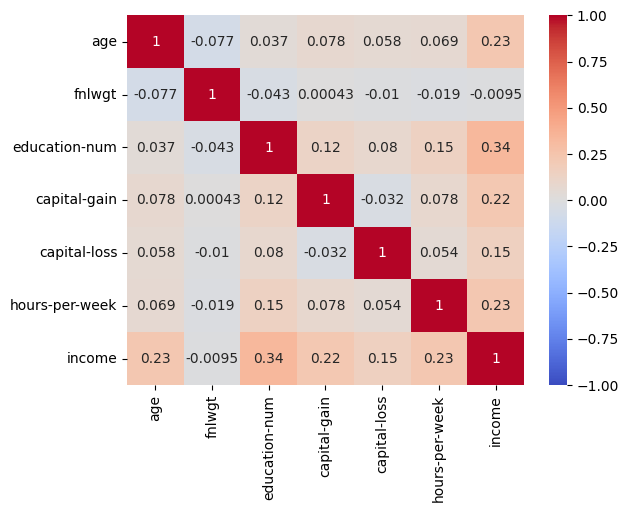

In [12]:
sns.heatmap(df.corr(numeric_only = True), vmax = 1, vmin = -1, annot = True, cmap='coolwarm')

###Missing value treatment

In [13]:
# Null value detection
df.isnull().sum()[df.isnull().sum()>0]

,0
workclass,1836
occupation,1843
native-country,583


In [14]:
df[df['occupation'].isnull() & df['workclass'].notnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5361,18,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,0
10845,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,0
14772,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,0
20337,18,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,0
23232,20,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,0
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,0
32314,18,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,0


In [15]:
def occupation(row):
    if row['workclass'] == 'Never-worked':
        return 'Fresher'  # Assign 'Fresher' if workclass is 'Never-worked'
    else:
        return row['occupation']

In [16]:
df.occupation = df.apply(occupation, axis = 1)

In [17]:
df.fillna({'occupation': 'Unemployed'}, inplace=True)

In [18]:
df.fillna({'workclass': 'Not_in_Labor_Force'}, inplace=True)

In [19]:
x = df.fillna({'native-country': 'Unknown'}, inplace = True)

In [20]:
df.isnull().sum()[df.isnull().sum()>0]

,0


###Train - Test split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x = df.drop('income', axis = 1)
y = df['income']

In [91]:
x1train, x1test, y1train, y1test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)
print(x1train.shape)
print(x1test.shape)
print(y1train.shape)
print(y1test.shape)

(26048, 14)
(6513, 14)
(26048,)
(6513,)


###Encoding

In [24]:
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
num_cols = []
for i in df.columns:
  if i not in cat_cols:
    num_cols.append(i)

print(num_cols)

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [25]:
for i in cat_cols:
  print(df[i].value_counts())

Private               22696
Self-emp-not-inc       2541
Local-gov              2093
Not_in_Labor_Force     1836
State-gov              1298
Self-emp-inc           1116
Federal-gov             960
Without-pay              14
Never-worked              7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-cl

In [26]:
country_counts = df['native-country'].value_counts()
threshold = 100

In [27]:
def bin_countries(country):
    if country_counts[country] < threshold:
        return 'Other'
    return country

In [28]:
df['native-country'] = df['native-country'].apply(bin_countries)


In [29]:
for i in cat_cols:
  print(df[i].value_counts())

# since none of the subcategory in a particular cat_col is having same count so we can apply frequency encoding

Private               22696
Self-emp-not-inc       2541
Local-gov              2093
Not_in_Labor_Force     1836
State-gov              1298
Self-emp-inc           1116
Federal-gov             960
Without-pay              14
Never-worked              7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-cl

In [30]:
for i in cat_cols:
  if i != 'income':
    z = x1train[i].value_counts(normalize = True).to_dict()
    xtrain[i] = x1train[i].map(z)


In [31]:
xtrain.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
15738,32,0.694833,37210,0.163506,13,0.460650,0.125077,0.406404,0.855459,0.669341,0,0,45,0.895846
27985,43,0.694833,101950,0.053939,14,0.326397,0.125077,0.256027,0.855459,0.330659,0,0,45,0.895846
30673,20,0.056549,122244,0.321752,9,0.326397,0.056549,0.256027,0.855459,0.330659,0,0,28,0.895846
9505,40,0.065418,24763,0.223280,10,0.136671,0.048948,0.104960,0.855459,0.669341,6849,0,40,0.895846
26417,24,0.694833,113936,0.163506,13,0.326397,0.127534,0.154945,0.855459,0.669341,0,0,40,0.895846


In [92]:
xtrain = x1train.copy()
xtest = x1test.copy()
ytrain = y1train.copy()
ytest = y1test.copy()

In [32]:
for i in cat_cols:
  if i != 'income':
    z = xtest[i].value_counts(normalize = True).to_dict()
    xtest[i] = xtest[i].map(z)

In [33]:
xtest.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
9009,31,0.034086,117963,0.012897,16,0.334869,0.125595,0.158452,0.849532,0.668663,0,0,40,0.895901
25134,20,0.055735,201490,0.226470,10,0.334869,0.055735,0.158452,0.849532,0.668663,0,0,40,0.895901
16682,78,0.034086,385242,0.168279,13,0.457086,0.124060,0.400276,0.849532,0.668663,9386,0,45,0.895901
27044,32,0.705819,164197,0.168279,13,0.457086,0.122831,0.400276,0.849532,0.668663,0,0,44,0.895901
3302,61,0.705819,92691,0.325503,9,0.457086,0.125749,0.400276,0.849532,0.668663,0,0,3,0.895901


###Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [35]:
scaled_train = sc.fit_transform(xtrain)
scaled_test = sc.transform(xtest)

###Model Building

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [37]:
vif_data = pd.DataFrame()
vif_data['features'] = xtrain.columns
vif_data['vif_value'] = [vif(xtrain.values, i) for i in range(xtrain.shape[1])]
print(vif_data)

# no such high multicollinearity in dataset

          features  vif_value
0              age   9.031318
1        workclass   3.809916
2           fnlwgt   3.994515
3        education   3.668740
4    education-num  16.566876
5   marital-status  10.171844
6       occupation   9.412754
7     relationship  11.066258
8             race   8.494018
9              sex  19.187429
10    capital-gain   1.046325
11    capital-loss   1.062803
12  hours-per-week  12.081377
13  native-country   9.905883


In [38]:
ytrain_series = pd.Series(ytrain, name='income')

In [39]:
x_scaled_train = pd.DataFrame(scaled_train,index=ytrain_series.index,  columns=xtrain.columns)


In [40]:
# Base model
import statsmodels.api as sma

base_model=sma.Logit(ytrain_series,sma.add_constant(x_scaled_train)).fit()
print(base_model.summary())

Optimization terminated successfully.
         Current function value: 0.352733
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 income   No. Observations:                26048
Model:                          Logit   Df Residuals:                    26033
Method:                           MLE   Df Model:                           14
Date:                Wed, 09 Oct 2024   Pseudo R-squ.:                  0.3610
Time:                        08:14:34   Log-Likelihood:                -9188.0
converged:                       True   LL-Null:                       -14379.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.6856      0.026    -65.875      0.000      -1.736      -1.635
age              

In [41]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,StackingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [42]:

models = []
precision = []
accuracy = []
recall = []
f1 = []

def model_validationn (model,xtrain,ytrain,xtest,ytest):
    m = model
    m.fit(scaled_train,ytrain)
    pred = m.predict(scaled_test)
    prob = m.predict_proba(scaled_test)[:,1]

    print('confusion_matrix\n',confusion_matrix(ytest,pred))
    print('classification_report\n',classification_report(ytest,pred))
    print('ROC_AUC',roc_auc_score(ytest,prob))
    fpr,tpr,_ = roc_curve(ytest,prob)
    plt.plot(fpr,tpr,color='red')
    plt.plot([0,1],[0,1],color='green')
    plt.show()

    resp = 'y'
    if resp.lower() == 'y':
        models.append(str(m))
        precision.append(precision_score(ytest,pred))
        recall.append(recall_score(ytest,pred))
        f1.append(f1_score(ytest,pred))
        accuracy.append(accuracy_score(ytest,pred))

        global model_df
        model_df = pd.DataFrame({'model': models,
                                'accuracy':accuracy,
                                'precision':precision,
                                'recall':recall,
                                 'f1':f1})
    else:
        return

In [43]:
model_ = [AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),XGBClassifier(),GaussianNB(),DecisionTreeClassifier(),KNeighborsClassifier()]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



confusion_matrix
 [[4586  359]
 [ 551 1017]]
classification_report
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4945
           1       0.74      0.65      0.69      1568

    accuracy                           0.86      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513

ROC_AUC 0.9153938863209592


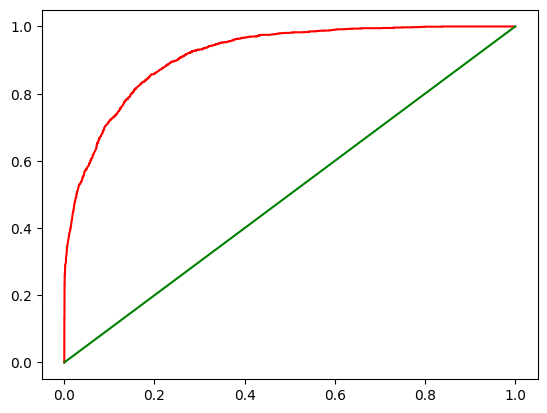

confusion_matrix
 [[4619  326]
 [ 532 1036]]
classification_report
               precision    recall  f1-score   support

           0       0.90      0.93      0.92      4945
           1       0.76      0.66      0.71      1568

    accuracy                           0.87      6513
   macro avg       0.83      0.80      0.81      6513
weighted avg       0.86      0.87      0.86      6513

ROC_AUC 0.9242755127834754


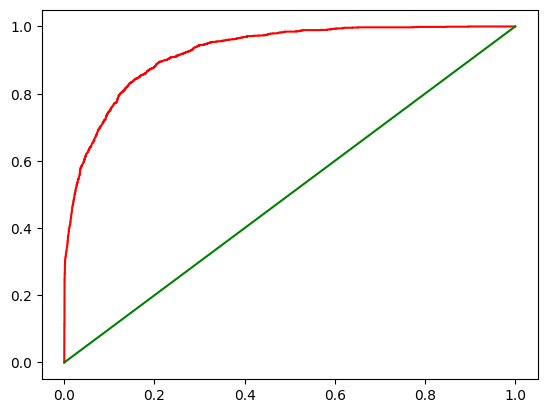

confusion_matrix
 [[4559  386]
 [ 529 1039]]
classification_report
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      4945
           1       0.73      0.66      0.69      1568

    accuracy                           0.86      6513
   macro avg       0.81      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513

ROC_AUC 0.9090864948102597


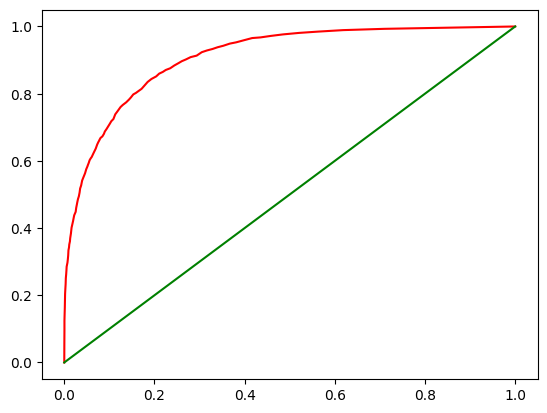

confusion_matrix
 [[4923   22]
 [1190  378]]
classification_report
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      4945
           1       0.94      0.24      0.38      1568

    accuracy                           0.81      6513
   macro avg       0.88      0.62      0.64      6513
weighted avg       0.84      0.81      0.77      6513

ROC_AUC 0.8606643744454304


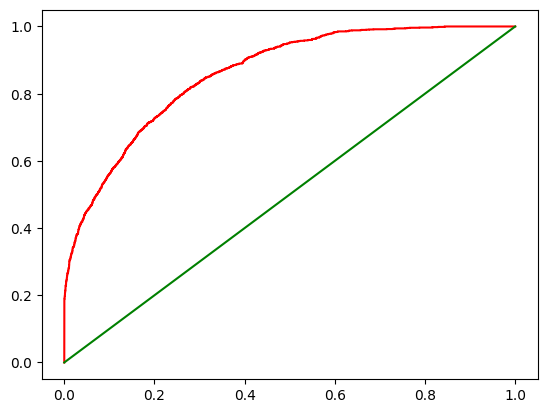

confusion_matrix
 [[4681  264]
 [ 918  650]]
classification_report
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4945
           1       0.71      0.41      0.52      1568

    accuracy                           0.82      6513
   macro avg       0.77      0.68      0.71      6513
weighted avg       0.81      0.82      0.80      6513

ROC_AUC 0.855956980871216


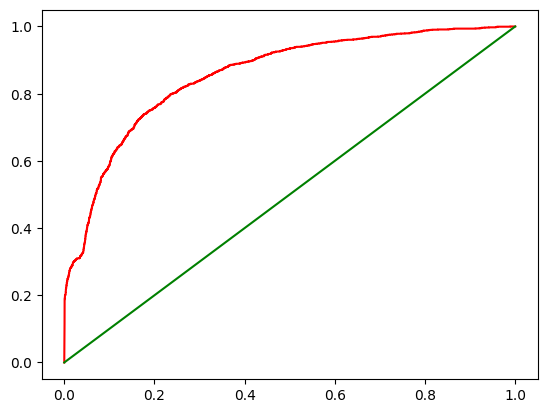

confusion_matrix
 [[4253  692]
 [ 565 1003]]
classification_report
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      4945
           1       0.59      0.64      0.61      1568

    accuracy                           0.81      6513
   macro avg       0.74      0.75      0.74      6513
weighted avg       0.81      0.81      0.81      6513

ROC_AUC 0.7498645173438435


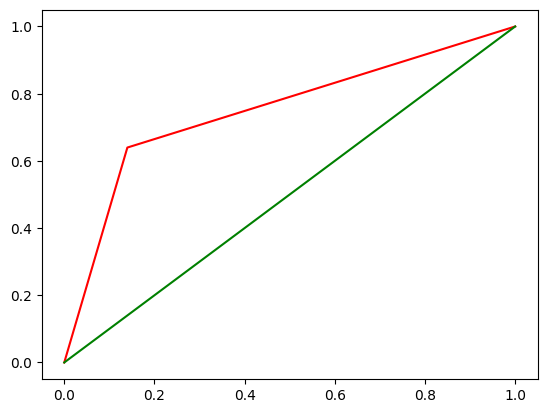

confusion_matrix
 [[4491  454]
 [ 641  927]]
classification_report
               precision    recall  f1-score   support

           0       0.88      0.91      0.89      4945
           1       0.67      0.59      0.63      1568

    accuracy                           0.83      6513
   macro avg       0.77      0.75      0.76      6513
weighted avg       0.83      0.83      0.83      6513

ROC_AUC 0.8562161454571717


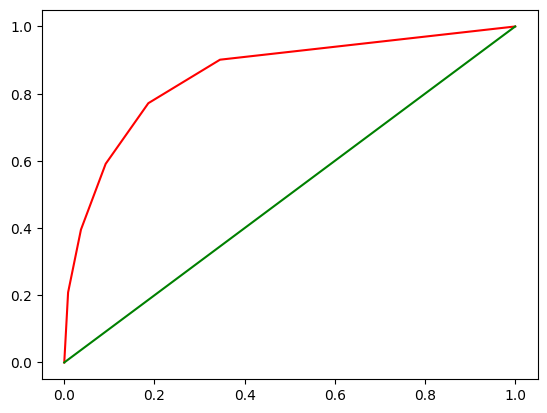

In [44]:
for i in model_:
    model_validationn(i,scaled_train,ytrain,scaled_test,ytest)

In [45]:
model_df
# choose GradientBoostingClassifier() max F1 score


,model,accuracy,precision,recall,f1
0,AdaBoostClassifier(),0.860279,0.739099,0.648597,0.690897
1,GradientBoostingClassifier(),0.868263,0.760646,0.660714,0.707167
2,RandomForestClassifier(),0.859512,0.729123,0.662628,0.694287
3,"XGBClassifier(base_score=None, booster=None, c...",0.813911,0.945000,0.241071,0.384146
4,GaussianNB(),0.818517,0.711160,0.414541,0.523771
5,DecisionTreeClassifier(),0.807001,0.591740,0.639668,0.614772
6,KNeighborsClassifier(),0.831875,0.671253,0.591199,0.628688


In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [48]:
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid,
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=2)

In [49]:
# grid_search.fit(x_scaled_train, ytrain)

In [50]:
#best_params = grid_search.best_params_
#print("Best Hyperparameters:", best_params)

In [51]:
best_params = {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

confusion_matrix
 [[4573  372]
 [ 465 1103]]
classification_report
               precision    recall  f1-score   support

           0       0.91      0.92      0.92      4945
           1       0.75      0.70      0.72      1568

    accuracy                           0.87      6513
   macro avg       0.83      0.81      0.82      6513
weighted avg       0.87      0.87      0.87      6513

ROC_AUC 0.9294878871670004


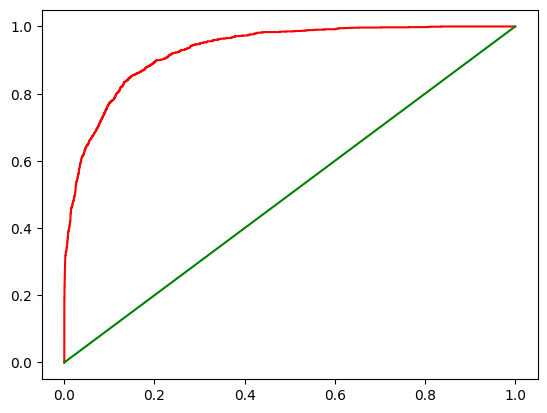

In [52]:
final_model = GradientBoostingClassifier(**best_params)

model_validationn(final_model,scaled_train,ytrain,scaled_test,ytest)

In [53]:
model_df

,model,accuracy,precision,recall,f1
0,AdaBoostClassifier(),0.860279,0.739099,0.648597,0.690897
1,GradientBoostingClassifier(),0.868263,0.760646,0.660714,0.707167
2,RandomForestClassifier(),0.859512,0.729123,0.662628,0.694287
3,"XGBClassifier(base_score=None, booster=None, c...",0.813911,0.945000,0.241071,0.384146
4,GaussianNB(),0.818517,0.711160,0.414541,0.523771
5,DecisionTreeClassifier(),0.807001,0.591740,0.639668,0.614772
6,KNeighborsClassifier(),0.831875,0.671253,0.591199,0.628688
7,"GradientBoostingClassifier(max_depth=5, min_sa...",0.871488,0.747797,0.703444,0.724942


In [54]:
#best_params1 = grid_search.best_params_
#print("Best Hyperparameters:", best_params1)

In [55]:
best_params1 = {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

confusion_matrix
 [[4560  385]
 [ 435 1133]]
classification_report
               precision    recall  f1-score   support

           0       0.91      0.92      0.92      4945
           1       0.75      0.72      0.73      1568

    accuracy                           0.87      6513
   macro avg       0.83      0.82      0.83      6513
weighted avg       0.87      0.87      0.87      6513

ROC_AUC 0.9310509352881698


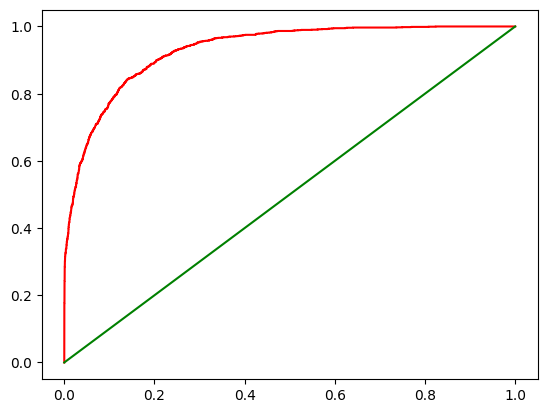

In [56]:
final_model1 = GradientBoostingClassifier(**best_params1)

model_validationn(final_model1,scaled_train,ytrain,scaled_test,ytest)

In [57]:
model_df

,model,accuracy,precision,recall,f1
0,AdaBoostClassifier(),0.860279,0.739099,0.648597,0.690897
1,GradientBoostingClassifier(),0.868263,0.760646,0.660714,0.707167
2,RandomForestClassifier(),0.859512,0.729123,0.662628,0.694287
3,"XGBClassifier(base_score=None, booster=None, c...",0.813911,0.945000,0.241071,0.384146
4,GaussianNB(),0.818517,0.711160,0.414541,0.523771
5,DecisionTreeClassifier(),0.807001,0.591740,0.639668,0.614772
6,KNeighborsClassifier(),0.831875,0.671253,0.591199,0.628688
7,"GradientBoostingClassifier(max_depth=5, min_sa...",0.871488,0.747797,0.703444,0.724942
8,"GradientBoostingClassifier(max_depth=4, min_sa...",0.874098,0.746377,0.722577,0.734284


In [58]:
final_mod=XGBClassifier(**best_params1).fit(scaled_train,ytrain)
final_pred=final_mod.predict(scaled_test)
print(confusion_matrix(ytest,final_pred))
print(classification_report(ytest,final_pred))
print(accuracy_score(ytest,final_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[08:15:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.




[[4929   16]
 [1192  376]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      4945
           1       0.96      0.24      0.38      1568

    accuracy                           0.81      6513
   macro avg       0.88      0.62      0.64      6513
weighted avg       0.84      0.81      0.77      6513

0.8145247965607247


In [59]:
# Accuracy = 81%

In [69]:
ytest.shape

(6513,)

In [71]:
x_scaled_test = pd.DataFrame(scaled_test, columns=xtest.columns)

##Bias Detection


Present on the basis of sex and race

In [102]:
results_df = pd.DataFrame({
    'y_true': ytest,
    'y_pred': final_pred,
    'race': xtest['race'].values,   # Replace with the actual column names
    'sex': xtest['sex'].values
})


In [97]:
race_groups = results_df.groupby('race')

# Calculate the positive prediction rate for each group
group_rates = race_groups['y_pred'].mean()

print(group_rates)

race
Amer-Indian-Eskimo    0.054795
Asian-Pac-Islander    0.050000
Black                 0.031722
Other                 0.066667
White                 0.063980
Name: y_pred, dtype: float64


In [101]:
# Predicted probabilities for different race categories
race_probs = {
    'Amer-Indian-Eskimo': 0.054795,
    'Asian-Pac-Islander': 0.050000,
    'Black': 0.031722,
    'Other': 0.066667,
    'White': 0.063980
}

# Calculate Disparate Impact for selected race categories
prob_white = race_probs['White']
prob_black = race_probs['Black']

# Calculate Disparate Impact
disparate_impact_race = prob_white / prob_black if prob_black != 0 else None


print(f'Disparate Impact (White to Black): {disparate_impact_race:.2f}')


Disparate Impact (White to Black): 2.02


In [ ]:
# The Disparate Impact of 2.02 indicates that the predicted positive outcome for Black individuals is approximately half that of White individuals, suggesting potential bias against the Black group in the model's predictions.

In [98]:
sex = results_df.groupby('sex')

# Calculate the positive prediction rate for each group
sex_rates = sex['y_pred'].mean()

print(group_rates)


sex
Female    0.037071
Male      0.071642
Name: y_pred, dtype: float64


In [100]:
# Predicted probabilities for Females and Males
prob_female = 0.037071
prob_male = 0.071642

# Calculate Disparate Impact
disparate_impact = prob_male / prob_female
print(f'Disparate Impact (Male to Female): {disparate_impact:.2f}')


Disparate Impact (Male to Female): 1.93


In [ ]:
# A Disparate Impact of 1.93 indicates that males are nearly twice as likely to receive a positive outcome compared to females,
# suggesting a significant bias favoring males in the model's predictions.

##Explainability

In [103]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 15.5 MB/s eta 0:00:00


In [104]:
import shap
import numpy as np


In [111]:
# Create a SHAP explainer
explainer = shap.Explainer(final_mod, x_scaled_train)  # Use your trained model and training data


In [112]:
# Calculate SHAP values for the test set
shap_values = explainer(x_scaled_test)  # Use your scaled test data

 98%|===================| 6394/6513 [00:24<00:00]       

In [ ]:
shap_values

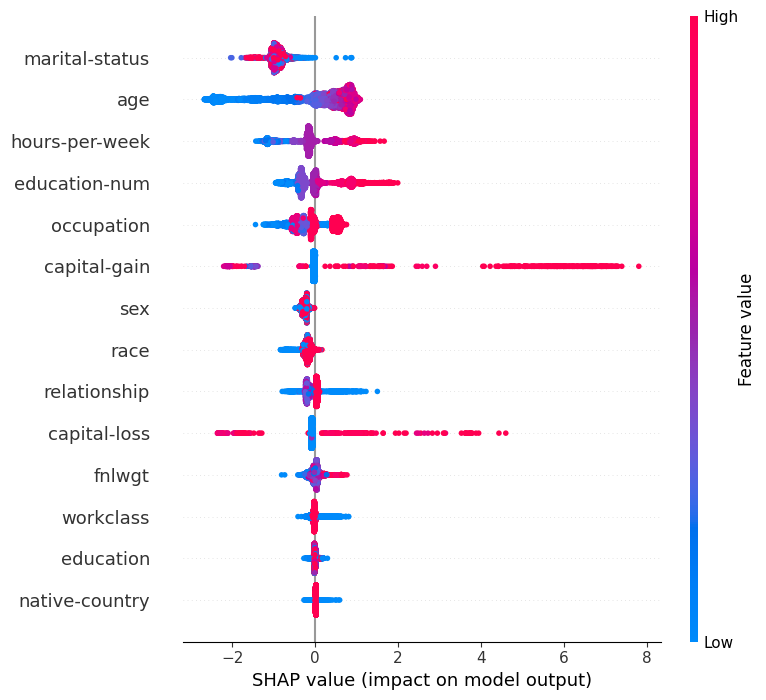

In [113]:
shap.summary_plot(shap_values, x_scaled_test)  # Visualize all featuresv

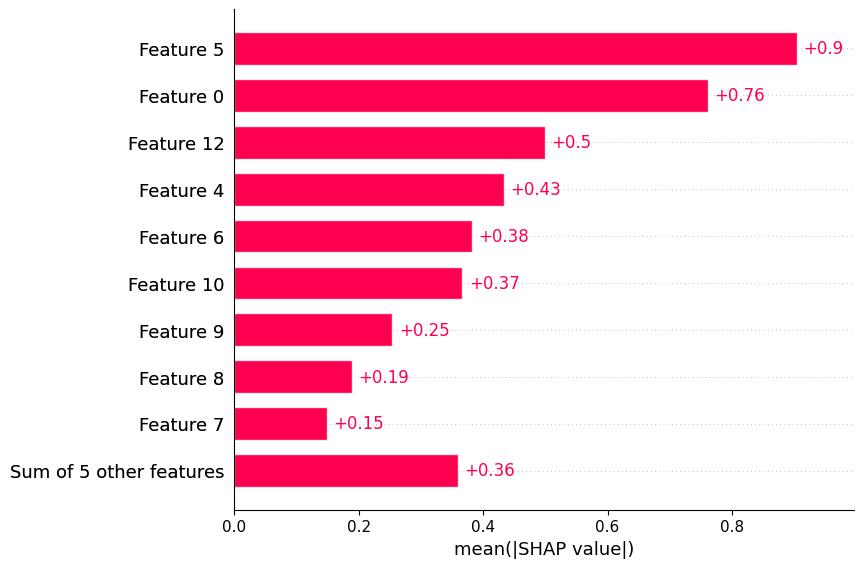

In [109]:
shap.plots.bar(shap_values)  # Show feature importance

In [110]:
# Feature 0 and 5 maximally contribute to income > 50k

.values =
array([[-0.0833929 ,  0.39261958,  0.0185563 , ..., -0.08233257,
        -0.18659156,  0.02301821],
       [-2.41661335, -0.06891597, -0.14173659, ..., -0.09406218,
        -0.11291989,  0.01586649],
       [-0.47963027,  0.73064117,  0.03252517, ..., -0.05661107,
         0.35632195,  0.01349491],
       ...,
       [ 0.72264798, -0.00963095, -0.08564441, ..., -0.08329955,
         0.62696392,  0.02270365],
       [-0.15153224, -0.01799593,  0.0868567 , ..., -0.07816482,
        -0.519213  ,  0.01804603],
       [-1.91691727, -0.04803952,  0.65934873, ..., -0.11139761,
        -0.50058946,  0.00521962]])

.base_values =
array([-2.51714002, -2.51714002, -2.51714002, ..., -2.51714002,
       -2.51714002, -2.51714002])

.data =
array([[-0.55637491, -1.58490693, -0.68277877, ..., -0.21736176,
        -0.03871413,  0.34115877],
       [-1.36278194, -1.51127652,  0.10888388, ..., -0.21736176,
        -0.03871413,  0.34115877],
       [ 2.88918236, -1.58490693,  1.85047159, ..., -0